In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
import glob
import itertools
import os
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [4]:
sys.path.append("../../..")

In [5]:
from bertrand.model.tokenization import AA_list
from bertrand.negative_decoys.basic_filtering import (
    basic_filtering as basic_filtering_bertrand,
)
from bertrand.negative_decoys.basic_filtering import (
    read_positives_and_group_by_tcr,
    read_reference_tcrs,
)

# Binders

In [6]:
from bertrand.immrep.data_sources import read_test, read_train_be

In [7]:
test = read_test()
train = read_train_be()

# Non-binders

In [9]:
import zipfile

with zipfile.ZipFile(
    "../../../data/dean_tcr_repertoires/hip-samples-tsv.zip", mode="r"
) as archive:
    filenames = [f.filename for f in archive.filelist if f.filename.endswith("tsv")]

    tcr_list = []
    for filename in tqdm(filenames[:85]):
        print(filename)
        df = pd.read_csv(archive.open(filename), sep="\t")
        raise Exception()
        print(f"{len(df)} TCRs")
        df = df[(df.sequenceStatus == "In") & (df.cloneResolved == "VDJ")]
        print(f"{len(df)} productive TCRs")
        cdrs = df.aminoAcid.dropna().drop_duplicates().reset_index(drop=True)
        print(f"{len(cdrs)} unique CDR3")

        cdrs = basic_filtering(cdrs)
        print(f"{len(cdrs)} OK CDR3")
        tcr_list.append(cdrs)

#     cdrs =
#     dfs[filename] = df

  0%|          | 0/85 [00:00<?, ?it/s]

HIP12091.tsv


Exception: 

In [13]:
df = df[(df.sequenceStatus == "In") & (df.cloneResolved == "VDJ")]

In [16]:
# df.iloc[0]

In [22]:
regex = f"[{''.join(AA_list)}]+"
regex
def basic_filtering(ref, train, test):
    return ref[
        (~ref.aminoAcid.isin(train.CDR3a_extended)) 
        & (~ref.aminoAcid.isin(test.CDR3a_extended)) 
        & (~ref.aminoAcid.isin(train.CDR3b_extended)) 
        & (~ref.aminoAcid.isin(test.CDR3b_extended)) 
        & ref.aminoAcid.str.len().isin(range(7, 25))
        & (ref.aminoAcid.str[0] == "C")
        & ref.aminoAcid.str.fullmatch(regex)
    ].reset_index(drop=True)



In [23]:
dff = basic_filtering(df, train, test)

In [24]:
dfa = dff

(124120, 47)

In [27]:
dff.sample(100)

,nucleotide,aminoAcid,count (reads),frequencyCount (%),cdr3Length,vMaxResolved,vFamilyName,vGeneName,vGeneAllele,vFamilyTies,...,estimatedNumberGenomes,sequenceStatus,cloneResolved,vOrphon,dOrphon,jOrphon,vFunction,dFunction,jFunction,fractionNucleated
76461,ATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATCTCTGTGCCA...,CASSSSPGPREQYF,4,0.000246,42,TCRBV07-02*01,TCRBV07,TCRBV07-02,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
115657,CTGGAGTCCGCCAGCACCAACCAGACATCTATGTACCTCTGTGCCA...,CASCSGSIADTQYF,2,0.000123,42,TCRBV28-01*01,TCRBV28,TCRBV28-01,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82129,GAGCTTGGTGACTCTGCTGTGTATTTCTGTGCCAGCAGCCCGGGAC...,CASSPGLAGGGRTYEQYF,4,0.000246,54,TCRBV03,TCRBV03,unresolved,NaN,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
24406,AAGATCCGGTCCACAAAGCTGGAGGACTCAGCCATGTACTTCTGTG...,CASSEDRDYGYTF,11,0.000677,39,TCRBV02-01*01,TCRBV02,TCRBV02-01,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
76435,ATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATCTCTGTGCCA...,CASSRTGGVYGYTF,4,0.000246,42,TCRBV07-02*01,TCRBV07,TCRBV07-02,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118502,GCCAGCACCAACCAGACATCTATGTACCTCTGTGCCAGCAGTTTGG...,CASSLGVPGGSNTEAFF,2,0.000123,51,TCRBV28-01*01,TCRBV28,TCRBV28-01,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
58767,GTGAACGCCTTGGAGCTGGAGGACTCGGCCCTGTATCTCTGTGCCA...,CASSSGQGHTEAFF,6,0.000369,42,TCRBV05-08*01,TCRBV05,TCRBV05-08,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
24513,ACAAAGCTGGAGGACTCAGCCATGTACTTCTGTGCCAGCAGTGAAG...,CASSEASGGLNLDEQYF,11,0.000677,51,TCRBV02-01*01,TCRBV02,TCRBV02-01,1.0,NaN,...,2,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12202,ACGATCCAGCGCACAGAGCAGCGGGACTCGGCCATGTATCGCTGTG...,CASSLERLTEAFF,17,0.001046,39,TCRBV07-06*01,TCRBV07,TCRBV07-06,1.0,NaN,...,1,In,VDJ,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [83]:
ref_ab = ref_ab.rename(columns=dict(CDR3_alpha='CDR3a', CDR3_beta='CDR3b'))

In [84]:
ref_ab = basic_filtering(ref_ab, train, test)
print(ref_ab.shape)

(239815, 43)


In [86]:
ref_ab[['CDR3a', 'CDR3b']].drop_duplicates().shape

(55341, 2)

In [59]:
SEED = 42

In [67]:
test_trav = ref_ab.TRAV.drop_duplicates().sample(frac=0.04, random_state=SEED)
test_traj = ref_ab.TRAJ.drop_duplicates().sample(frac=0.04, random_state=SEED)
test_trbv = ref_ab.TRBV.drop_duplicates().sample(frac=0.04, random_state=SEED)
test_trbj = ref_ab.TRBJ.drop_duplicates().sample(frac=0.04, random_state=SEED)

In [68]:
test_mask = (
    ref_ab.TRAV.isin(test_trav)
    | ref_ab.TRAJ.isin(test_traj)
    | ref_ab.TRBV.isin(test_trbv)
    | ref_ab.TRBJ.isin(test_trbj)
)

In [69]:
test_mask.sum()

36169

In [70]:
train_mask = ~test_mask

In [71]:
train_mask.sum()

203646

In [72]:
train_mask.mean()

0.8491795759231074

In [74]:
train_mlm = ref_ab[train_mask].reset_index(drop=True)
test_mlm = ref_ab[test_mask].reset_index(drop=True)

In [75]:
train_mlm[['CDR3a', 'CDR3b']].to_csv('../../../data/immrep/tcr_mlm_train.csv.gz', index=False)

In [76]:
test_mlm[['CDR3a', 'CDR3b']].to_csv('../../../data/immrep/tcr_mlm_test.csv.gz', index=False)

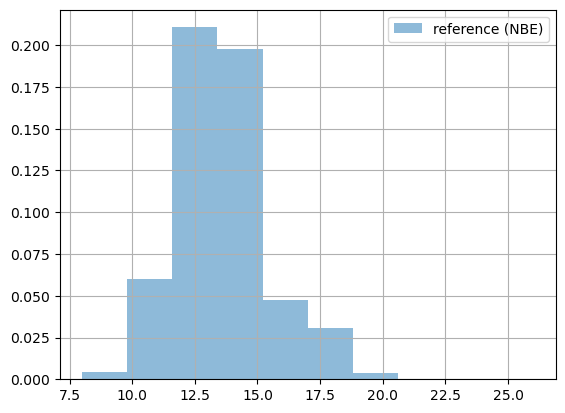

In [41]:
ax = plt.gca()
ref_ab.CDR3a.str.len().hist(ax=ax, density=True, alpha=0.5, label="reference alpha")
ref_tcrs_oakes.str.len().hist(ax=ax, density=True, alpha=0.5, label="reference (Oakes)")
df_pos.CDR3b.str.len().hist(ax=ax, density=True, alpha=0.5, label="binders")
plt.legend()
plt.show()

In [47]:
def downsample_length(dataset, frac=1):
    pos = dataset[dataset.y == 1]
    neg = dataset[dataset.y == 0]

    pos_count = pos.CDR3b.str.len().value_counts().sort_index()
    neg_count = neg.CDR3b.str.len().value_counts().sort_index()

    ratio = pos_count / neg_count
    max_ratio = ratio.max()

    to_remove = round((neg_count * (max_ratio - ratio)) / max_ratio).astype(int)
    to_sample = neg_count - to_remove

    neg_samples = []
    for length, n_to_sample in to_sample.iteritems():
        neg_sample = neg[neg.CDR3b.str.len() == length].sample(int(n_to_sample * frac), random_state=42)
        neg_samples.append(neg_sample)
    dataset_downsampled = pd.concat([pos] + neg_samples)
    return dataset_downsampled

In [52]:
unique_tcrs.shape

(11407093,)

In [56]:
ref_tcrs_dean = basic_filtering_bertrand(unique_tcrs, df_pos)

INFO:root:Basic filtering: started with 11407093 reference TCRs, 11407093 after filtering


In [57]:
ref_tcrs_dean = ref_tcrs_dean.rename(columns={"CDR3b": "junction_aa"}).drop(columns="y")

In [58]:
ref_tcrs_dean.sample(5)

,junction_aa
1915758,CASSLADLGGLEQYF
453050,CASRYGGSSDTQYF
2007832,CASSTAGPPQFWAGTDTQYF
7020283,CASSFVRLEQFF
4305700,CASSEAQGAEETQYF


In [61]:
ref_tcrs_dean.to_csv("../../data/dean_tcr_repertoires/dean_downsampled_11M.csv.gz")

In [62]:
d = pd.read_csv("../../data/presented_peptides.csv.gz", index_col=0)

In [63]:
d.head()

,HLA_type,Peptide2,is_presented
abelin_pos_1,A02:01,KLWEMDNMLI,1
abelin_pos_2,A02:03,KLYDIDVAKV,1
abelin_pos_4,A02:07,QVDDLKAKL,1
abelin_pos_6,A24:02,AYVHMVTHF,1
abelin_pos_10,B35:01,LPDEIYHVY,1


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/dean_tcr_repertoires/dean_downsampled_11M.csv.gz")

In [3]:
df.shape

(11407093, 2)

In [4]:
df2 = pd.read_csv("/mnt/storage2/olek/bertrand-rep3/pretraining/mlm_train.csv.gz")

In [5]:
df2.shape

(9125674, 4)

In [6]:
df3 = pd.read_csv("/mnt/storage2/olek/bertrand-rep3/pretraining/mlm_val.csv.gz")

In [7]:
df3.shape

(2281419, 4)